In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gmaps
import postcodes_io_api
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import pandas as pd 
import folium
from folium.plugins import HeatMap
import geopandas

In [2]:
df0= pd.read_csv('pricelondon.csv')

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242605 entries, 0 to 3242604
Data columns (total 16 columns):
ID             object
Price          int64
Date           object
Postcode       object
Type           object
Newbuild       object
Duration       object
PAON           object
SAON           object
Street         object
Locality       object
Town           object
District       object
County         object
Transaction    object
Record         object
dtypes: int64(1), object(15)
memory usage: 395.8+ MB


In [4]:
df0.isnull().sum()

ID                   0
Price                0
Date                 0
Postcode          5275
Type                 0
Newbuild             0
Duration             0
PAON                51
SAON           2200850
Street            2394
Locality       1584162
Town                 0
District             0
County               0
Transaction          0
Record               0
dtype: int64

In [5]:
df0.Date = pd.to_datetime(df0.Date)

In [6]:
df0 = df0.drop(labels=['Locality','SAON','Record'], axis=1)

In [7]:
df0 = df0.dropna()

In [11]:
df0.isna().sum()

ID             0
Price          0
Date           0
Postcode       0
Type           0
Newbuild       0
Duration       0
PAON           0
Street         0
Town           0
District       0
County         0
Transaction    0
dtype: int64

In [9]:
df0 = df0[df0.Type!='O']

In [10]:
district = df0.District.unique().tolist()

In [12]:
df0 = df0.sort_values(by='Date')

In [276]:
df0 = df0.reset_index(drop=True)

dis = dict()

for i in district:
    dis[i] = df0[df0.District == i]

for key,val in dis.items():
    df0[key] = dis[key]['Price'].rolling(100).mean()

In [15]:
df1 = df0[df0.Date > '2010-01-01']

In [16]:
df1['ordinal'] = df1['Date'].apply(lambda date: date.toordinal())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


plt.figure(figsize=(20,10))
for i in district:
    sns.regplot(data=df1, x='ordinal',y=i, fit_reg=True, robust=True, scatter_kws={'s': 1})
plt.legend(labels=district)
plt.show()

In [277]:
df0.head()

,ID,Price,Date,Postcode,Type,Newbuild,Duration,PAON,Street,Town,District,County,Transaction
0,{A4315312-90D5-42D1-85F6-3F3209E9C709},59995,1995-10-19,SM6 7AG,F,Y,L,55,CARAWAY PLACE,WALLINGTON,SUTTON,GREATER LONDON,A
1,{CEA5DDF7-F936-4DB1-934B-42C5CBF28AD8},292500,1995-08-31,HA3 6DD,D,Y,F,11,LAVENDER GARDENS,HARROW,HARROW,GREATER LONDON,A
2,{613A5A52-B86D-4F69-B56D-49E35D0A3C64},84000,1995-07-28,RM5 3YL,T,N,F,40,MOUNT PLEASANT ROAD,ROMFORD,HAVERING,GREATER LONDON,A
3,{7624595C-53BF-4AC8-9683-42C5F7CFA5C6},66500,1995-07-12,SE6 4EW,T,N,F,6,BROXTED ROAD,LONDON,LEWISHAM,GREATER LONDON,A
4,{A5053A3C-81C1-4CD1-8DEF-49E3C462498A},67995,1995-09-20,N22 6NP,T,N,F,155,MORLEY AVENUE,LONDON,HARINGEY,GREATER LONDON,A


plt.figure(figsize=(20,10))
ax = sns.regplot(data=df1, x='ordinal',y='EALING', fit_reg=True, robust=True, scatter_kws={'s': 1})
sns.regplot(data=df1, x='ordinal',y='HACKNEY', fit_reg=True, robust=True, scatter_kws={'s': 1})
plt.legend(labels=['EALING','HACKNEY'])

ax.set_xlabel('date')
new_labels = [datetime.date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)



plt.show()

Exploring EALING

In [18]:
ealing = df0[df0.District == 'EALING'].reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


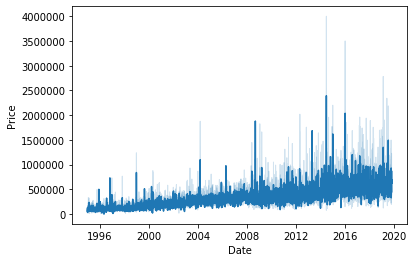

In [19]:
sns.lineplot(data=ealing, x='Date',y='Price')

In [20]:
ealing.Price.describe()

count    1.125210e+05
mean     2.897181e+05
std      2.606811e+05
min      1.000000e+00
25%      1.350000e+05
50%      2.263300e+05
75%      3.550000e+05
max      1.125000e+07
Name: Price, dtype: float64

In [21]:
eal10 = ealing[ealing.Date > '2010-01-01'].sort_values(by='Date').reset_index()

In [22]:
eal10['roll'] = eal10['Price'].rolling(100).mean()

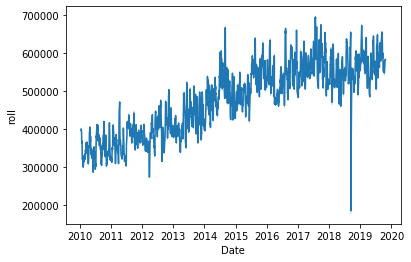

In [23]:
sns.lineplot(data=eal10, x='Date',y='roll')

In [24]:
eal10['roll'].describe()

count     33023.000000
mean     478850.662399
std       90155.837870
min      161134.010000
25%      401166.485000
50%      490349.520000
75%      549087.045000
max      703907.450000
Name: roll, dtype: float64


 mu = 478890.61 and sigma = 344677.95



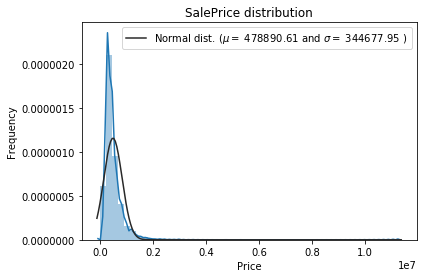

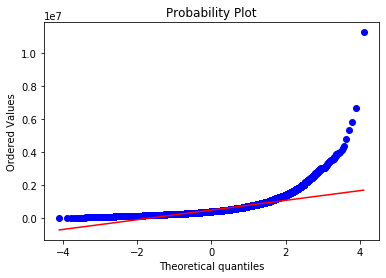

In [25]:
sns.distplot(eal10['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(eal10['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(eal10['Price'], plot=plt)
plt.show()


 mu = 12.90 and sigma = 0.58



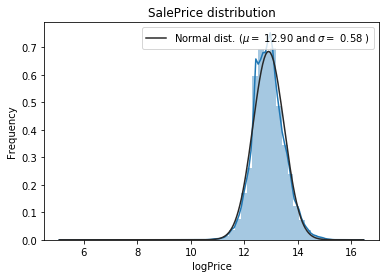

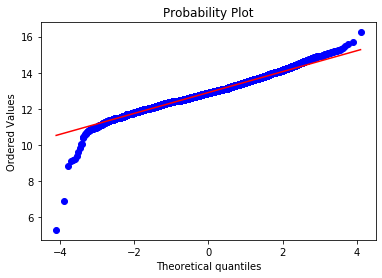

In [26]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
eal10['logPrice'] = np.log1p(eal10['Price'])

#Check the new distribution 
sns.distplot(eal10['logPrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(eal10['logPrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(eal10['logPrice'], plot=plt)
plt.show()

# postcode to latitude

In [8]:
pc = pd.read_csv('postcodes.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,17,18,21,22,24,25,29,32,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
pc.Postcode

0          AB1 0AA
1          AB1 0AB
2          AB1 0AD
3          AB1 0AE
4          AB1 0AF
            ...   
2623686    ZE3 9JW
2623687    ZE3 9JX
2623688    ZE3 9JY
2623689    ZE3 9JZ
2623690    ZE3 9XP
Name: Postcode, Length: 2623691, dtype: object

In [10]:
pc.Households

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
2623686    16.0
2623687    15.0
2623688    12.0
2623689    24.0
2623690     NaN
Name: Households, Length: 2623691, dtype: float64

In [11]:
pc = pc[['Postcode','Latitude', 'Longitude', 'Households', 'Population','Nearest station','Distance to station']]

In [12]:
pc =pc.reset_index(drop=True)

In [13]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2623691 entries, 0 to 2623690
Data columns (total 7 columns):
Postcode               object
Latitude               float64
Longitude              float64
Households             float64
Population             float64
Nearest station        object
Distance to station    float64
dtypes: float64(5), object(2)
memory usage: 140.1+ MB


In [14]:
df0.head()

,ID,Price,Date,Postcode,Type,Newbuild,Duration,PAON,Street,Town,District,County,Transaction
0,{A4315312-90D5-42D1-85F6-3F3209E9C709},59995,1995-10-19,SM6 7AG,F,Y,L,55,CARAWAY PLACE,WALLINGTON,SUTTON,GREATER LONDON,A
1,{CEA5DDF7-F936-4DB1-934B-42C5CBF28AD8},292500,1995-08-31,HA3 6DD,D,Y,F,11,LAVENDER GARDENS,HARROW,HARROW,GREATER LONDON,A
2,{613A5A52-B86D-4F69-B56D-49E35D0A3C64},84000,1995-07-28,RM5 3YL,T,N,F,40,MOUNT PLEASANT ROAD,ROMFORD,HAVERING,GREATER LONDON,A
3,{7624595C-53BF-4AC8-9683-42C5F7CFA5C6},66500,1995-07-12,SE6 4EW,T,N,F,6,BROXTED ROAD,LONDON,LEWISHAM,GREATER LONDON,A
4,{A5053A3C-81C1-4CD1-8DEF-49E3C462498A},67995,1995-09-20,N22 6NP,T,N,F,155,MORLEY AVENUE,LONDON,HARINGEY,GREATER LONDON,A


In [286]:
df = df0[['Price','Date','Postcode','District']]

In [267]:
pc[pc.Postcode.str.contains('00ABFX')]

,Postcode,Latitude,Longitude,Households,Population,Nearest station,Distance to station


In [287]:
df_merge = pd.merge(df, pc, on='Postcode')

In [288]:
df_merge.isnull().sum()

Price                       0
Date                        0
Postcode                    0
District                    0
Latitude                    0
Longitude                   0
Households             143428
Population             143428
Nearest station             0
Distance to station         0
dtype: int64

In [289]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3234512 entries, 0 to 3234511
Data columns (total 10 columns):
Price                  int64
Date                   datetime64[ns]
Postcode               object
District               object
Latitude               float64
Longitude              float64
Households             float64
Population             float64
Nearest station        object
Distance to station    float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 271.5+ MB


In [290]:
df_merge.head()

,Price,Date,Postcode,District,Latitude,Longitude,Households,Population,Nearest station,Distance to station
0,59995,1995-10-19,SM6 7AG,SUTTON,51.372557,-0.152311,80.0,144.0,Hackbridge,0.599323
1,79995,1995-12-07,SM6 7AG,SUTTON,51.372557,-0.152311,80.0,144.0,Hackbridge,0.599323
2,84995,1995-12-08,SM6 7AG,SUTTON,51.372557,-0.152311,80.0,144.0,Hackbridge,0.599323
3,59995,1995-11-24,SM6 7AG,SUTTON,51.372557,-0.152311,80.0,144.0,Hackbridge,0.599323
4,83995,1995-11-03,SM6 7AG,SUTTON,51.372557,-0.152311,80.0,144.0,Hackbridge,0.599323


In [291]:
dft = df_merge.set_index('Date')

In [292]:
dft.sort_index()

,Price,Postcode,District,Latitude,Longitude,Households,Population,Nearest station,Distance to station
Date,,,,,,,,,
1995-01-01,51500,NW4 4SZ,BARNET,51.593540,-0.234688,43.0,82.0,Colindale,1.093110
1995-01-01,128000,IG1 3NJ,REDBRIDGE,51.571322,0.054144,23.0,90.0,Redbridge,0.824272
1995-01-01,117000,SW17 9QF,WANDSWORTH,51.426048,-0.151348,17.0,60.0,Tooting,0.956421
1995-01-01,62995,SM2 5BB,SUTTON,51.347719,-0.197883,26.0,59.0,Belmont,0.415178
1995-01-01,84000,SW6 7UF,HAMMERSMITH AND FULHAM,51.482296,-0.201570,45.0,116.0,Fulham Broadway,0.474373
...,...,...,...,...,...,...,...,...,...
2019-10-28,632500,BR2 6DG,BROMLEY,51.342145,0.031187,30.0,84.0,New Addington,3.371770
2019-10-28,455000,CR0 3SG,CROYDON,51.376964,-0.105606,54.0,146.0,Centrale,0.178539
2019-10-28,26500,N2 9LA,HARINGEY,51.589764,-0.156359,22.0,52.0,East Finchley,0.638834


In [293]:
df98 = dft.loc['2010-01':'2010-02']

In [294]:
df98

,Price,Postcode,District,Latitude,Longitude,Households,Population,Nearest station,Distance to station
Date,,,,,,,,,
2010-01-15,242465,N22 6NP,HARINGEY,51.597961,-0.100828,42.0,110.0,Wood Green,0.603064
2010-02-15,330000,BR3 3QG,BROMLEY,51.399147,-0.037164,27.0,63.0,Elmers End,0.858003
2010-01-11,355000,NW2 2AA,BARNET,51.563608,-0.198065,46.0,99.0,Golders Green,0.982150
2010-02-05,310000,SW12 0ND,LAMBETH,51.445980,-0.140225,34.0,87.0,Balham,0.898722
2010-02-23,515000,SW18 5DH,WANDSWORTH,51.441303,-0.199497,45.0,132.0,Southfields,0.633198
...,...,...,...,...,...,...,...,...,...
2010-01-14,1030000,W1U 4HT,CITY OF WESTMINSTER,51.520553,-0.153203,NaN,NaN,Baker Street,0.384008
2010-01-29,195000,EN3 5AX,ENFIELD,51.655415,-0.048289,7.0,17.0,Southbury,0.798737
2010-01-07,90000,N17 6HU,HARINGEY,51.595362,-0.081517,56.0,166.0,Bruce Grove,0.782016


In [153]:
gdf = geopandas.GeoDataFrame(df98, geometry=geopandas.points_from_xy(df98.Longitude, df98.Latitude))
gdf.crs = {'init': 'epsg:4326', 'no_defs': True}

In [154]:
gdf = gdf.to_crs({'init': 'epsg:4326', 'no_defs': True})

In [155]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
DatetimeIndex: 12645 entries, 2010-01-15 to 2010-01-20
Data columns (total 9 columns):
Price                  12645 non-null int64
Postcode               12645 non-null object
Latitude               12645 non-null float64
Longitude              12645 non-null float64
Households             12596 non-null float64
Population             12596 non-null float64
Nearest station        12645 non-null object
Distance to station    12645 non-null float64
geometry               12645 non-null geometry
dtypes: float64(5), geometry(1), int64(1), object(2)
memory usage: 987.9+ KB


In [156]:
gdf.Price = gdf.Price.astype('float64')

In [194]:
max_amount = float(gdf['Price'].max())

hmap = folium.Map(location= [51.506949, -0.122876], zoom_start=13, tiles = 'cartodbpositron', control_scale=True)

hm_wide = HeatMap( data= gdf[['Latitude','Longitude','Price']].groupby(['Latitude','Longitude']).mean().reset_index().values.tolist(),
                   min_opacity=0.7,
                   max_val=max_amount,
                   radius=8, blur=11, 
                   max_zoom=15)
               
m.add_child(hm_wide)

In [320]:
gdd = geopandas.read_file('topo_lad-polygon.shp')

In [336]:
gdd.LAD13NM = gdd.LAD13NM.str.upper()

In [338]:
gdd[gdd.LAD13NM == 'HARROW']

,id,LAD13CD,LAD13CDO,LAD13NM,LAD13NMW,geometry
307,E09000015,E09000015,00AQ,HARROW,None,"POLYGON ((-0.26711 51.60065, -0.27120 51.59828..."


In [339]:
df98

,Price,Postcode,District,Latitude,Longitude,Households,Population,Nearest station,Distance to station
Date,,,,,,,,,
2010-01-15,242465,N22 6NP,HARINGEY,51.597961,-0.100828,42.0,110.0,Wood Green,0.603064
2010-02-15,330000,BR3 3QG,BROMLEY,51.399147,-0.037164,27.0,63.0,Elmers End,0.858003
2010-01-11,355000,NW2 2AA,BARNET,51.563608,-0.198065,46.0,99.0,Golders Green,0.982150
2010-02-05,310000,SW12 0ND,LAMBETH,51.445980,-0.140225,34.0,87.0,Balham,0.898722
2010-02-23,515000,SW18 5DH,WANDSWORTH,51.441303,-0.199497,45.0,132.0,Southfields,0.633198
...,...,...,...,...,...,...,...,...,...
2010-01-14,1030000,W1U 4HT,CITY OF WESTMINSTER,51.520553,-0.153203,NaN,NaN,Baker Street,0.384008
2010-01-29,195000,EN3 5AX,ENFIELD,51.655415,-0.048289,7.0,17.0,Southbury,0.798737
2010-01-07,90000,N17 6HU,HARINGEY,51.595362,-0.081517,56.0,166.0,Bruce Grove,0.782016


In [340]:
choro = df98.groupby(['District'],as_index=False).mean().drop(['Latitude','Longitude','Households','Distance to station'],axis=1)

In [341]:
choro

,District,Price,Population
0,BARKING AND DAGENHAM,1.735137e+05,95.955307
1,BARNET,4.283068e+05,69.976277
2,BEXLEY,2.240811e+05,80.738562
3,BRENT,3.142273e+05,92.945578
4,BROMLEY,3.117360e+05,67.724710
5,CAMDEN,7.358527e+05,71.615000
6,CITY OF LONDON,5.356379e+05,65.821429
7,CITY OF WESTMINSTER,8.351614e+05,63.450102
8,CROYDON,2.554803e+05,85.620952
9,EALING,3.406430e+05,87.038202


In [342]:
merged = gdd.merge(choro, left_on=gdd.LAD13NM, right_on=choro.District)

In [343]:
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 10 columns):
key_0         32 non-null object
id            32 non-null object
LAD13CD       32 non-null object
LAD13CDO      32 non-null object
LAD13NM       32 non-null object
LAD13NMW      0 non-null object
geometry      32 non-null geometry
District      32 non-null object
Price         32 non-null float64
Population    32 non-null float64
dtypes: float64(2), geometry(1), object(7)
memory usage: 2.8+ KB


In [346]:
merged.head()

,key_0,id,LAD13CD,LAD13CDO,LAD13NM,LAD13NMW,geometry,District,Price,Population
0,CITY OF LONDON,E09000001,E09000001,00AA,CITY OF LONDON,None,"POLYGON ((-0.08546 51.52037, -0.08301 51.51978...",CITY OF LONDON,535637.931034,65.821429
1,BARKING AND DAGENHAM,E09000002,E09000002,00AB,BARKING AND DAGENHAM,None,"MULTIPOLYGON (((0.07327 51.52929, 0.07245 51.5...",BARKING AND DAGENHAM,173513.687151,95.955307
2,BARNET,E09000003,E09000003,00AC,BARNET,None,"POLYGON ((-0.18201 51.66845, -0.18611 51.66310...",BARNET,428306.770073,69.976277
3,BEXLEY,E09000004,E09000004,00AD,BEXLEY,None,"MULTIPOLYGON (((0.19928 51.45852, 0.19928 51.4...",BEXLEY,224081.130719,80.738562
4,BRENT,E09000005,E09000005,00AE,BRENT,None,"POLYGON ((-0.26711 51.60065, -0.25975 51.59411...",BRENT,314227.310811,92.945578


In [361]:
hmap = folium.Map(location= [51.506949, -0.122876], zoom_start=10, tiles = 'cartodbpositron', control_scale=True)

folium.Choropleth(
    geo_data=merged.geometry,
    data=merged.Price,
    columns=['Price', 'Year 2017'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    bins=9,
    reset=True
).add_to(hmap)



hmap
